# pandas 
[pan]al  [da]ta

### for what?

- 전처리
    - row는 관측치, col은 변수의 2차원 데이터로 구성(db와 유사)

- EDA

### *pandas*의 장점

 1. numpy기반으로 만들어짐. 빠름
 2. 데이터 분석 도구도 포함
 2. R기능 대부분 제공해 편함
 2. NA처리가 쉽다
 3. 차원에 대한 장점



### 인덱스
- DataFrame: 데이터 read시 확인해야할 4가지
- 인덱싱/슬라이싱
- 데이터 필터링
- 예제: 강남구 아파트 데이터
- axis
- .str 이용하기
- 예제: 노벨상 수상자 데이터
- NA처리, replace
- Tidy Data
    - 구조바꾸기: melt, stack, unstack, pivot
    - Aggregation: groupby, pivot_table, cross_tab
    - 빌보드 데이터
    - 에볼라 데이터
- rename, astype
- .cat 이용하기
- 예제: tips 데이터

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdvega
# np.random.seed(0)

In [2]:
pd.__version__

'0.23.3'

### DataFrame

read시 우선 확인

1) .head()

2) .info() #astype 으로 데이터타입 조정해줘야

3) .describe() #include = 'object' 옵션 유용함

4)  .sample()


In [16]:
df = pd.read_csv('data/data-netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [4]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info() # object DataType은 주로 string
# memory usage -> 데이터를 메모리에 올려서 사용, 속도빠르지만 크기에 한계(dask 존재)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [8]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [10]:
df.sample(3)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
788,The Pirate Fairy,G,General Audiences. Suitable for all ages.,35,2014,57.0,80
698,Goldie & Bear,TV-Y,Suitable for all ages.,10,2016,77.0,80
717,Secret of the Wings,G,General Audiences. Suitable for all ages.,35,2012,65.0,80


In [22]:
iris= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None) # url에서 바로 읽어온다
# header에 index 넣으면 거기까지 header로 간주하고 날려버림

In [30]:
# iris.head()
# iris.info()
# iris.describe()
# iris.sample()

In [34]:
df2 =  pd.read_csv('data-netflix.csv', index_col='title') # col을 idx로 지정가능
df2.head(3)

,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
title,,,,,,
White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


In [37]:
df3 =  pd.read_csv('data/data-netflix.csv', usecols=['title','rating','release year']) # cols 지정해 가져오기 가능
df3.head(3)

,title,rating,release year
0,White Chicks,PG-13,2004
1,Lucky Number Slevin,R,2006
2,Grey's Anatomy,TV-14,2016


In [43]:
pd.read_csv('data/data-netflix.csv', skiprows=(1,3,4)).head(5)  #skiprows 

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
1,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
2,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
3,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
4,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80


In [48]:
pd.read_csv('data/data-netflix.csv', skipfooter=2, engine='python').info() #skip rows from footer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
title                998 non-null object
rating               998 non-null object
ratingLevel          940 non-null object
ratingDescription    998 non-null int64
release year         998 non-null int64
user rating score    604 non-null float64
user rating size     998 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.7+ KB


In [282]:
tip = sns.load_dataset('tips', engine = 'python') #engine 옵션을 명확히 주어서 c계열 등과 혼용에 따른 에러를 피한다 
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
pd.read_csv('data/data-netflix.csv', nrows=100).shape # reading only a subset of data

(100, 7)

#### read계열
대부분의 format을 지원하여 강력한 기능

In [56]:
#pd.read_excel('data-netflix.xlsx', sheet_name=0).head(3)
pd.read_json('data/data-netflix.json').head(3)
pd.read_pickle('data/data-netflix.p').head(3)

# pd.read_html() -> 비추, bs나 lxml등 이용하자

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


In [57]:
import sqlite3
conn = sqlite3.connect('data/data-netflix.sqlite')
df_sql = pd.read_sql_query("SELECT * FROM data_netflix;", conn) # db와 연동해 직접 쿼리한 결과를 받아올수있다
df_sql.head(3)

,ogc_fid,title,rating,ratinglevel,ratingdescription,release year,user rating score,user rating size
0,1,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82,80
1,2,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NA,82
2,3,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98,80


In [74]:
df =  pd.read_csv('data/data-netflix.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82,80
2,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
3,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98,80
4,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98,80


In [3]:
df.to_html('data/data-netflix.html') #html로 바로 넘기기도 가능

### 인덱싱/슬라이싱

__['col']__: dict 방식, series 리턴

__[['col']]__: dict 방식, df 리턴 (추천)

__.col__ : attribute 방식

#### *index 방식*

__loc__ gets rows (or columns) with particular ***labels*** from the index.  그래서 col은 이름으로 인덱싱

__iloc__ gets rows (or columns) at particular ***positions*** in the index (so it only takes integers). 그래서 col을 integer로 인덱싱

__ix__ usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index.(depreciated)

__at__ the fastest

__iat__ index based 'at'

In [5]:
df = df.head(5)

In [6]:
df['title'] # col을 가져옴, series

0             White Chicks
1      Lucky Number Slevin
2           Grey's Anatomy
3             Prison Break
4    How I Met Your Mother
Name: title, dtype: object

In [7]:
df[['title']] # col을 df로 가져옴

,title
0,White Chicks
1,Lucky Number Slevin
2,Grey's Anatomy
3,Prison Break
4,How I Met Your Mother


In [10]:
df[['rating', 'title']] # 당연히 여러 col 가져올수 있음

,rating,title
0,PG-13,White Chicks
1,R,Lucky Number Slevin
2,TV-14,Grey's Anatomy
3,TV-14,Prison Break
4,TV-PG,How I Met Your Mother


In [8]:
df.title

0             White Chicks
1      Lucky Number Slevin
2           Grey's Anatomy
3             Prison Break
4    How I Met Your Mother
Name: title, dtype: object

In [11]:
df.loc[[0,3]]  # pandas 에서는 기본적으로 리스트를 인자로 넣으면 여러개 인덱싱

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80


In [13]:
df.loc[1:3] # 슬라이싱

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80


In [17]:
df.columns

Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')

In [14]:
df.loc[1:3,['title','rating']]

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [68]:
df.loc[1:3,'title':'rating'] # 이게 된다, col에 Index가 들어갔기 때문

,title,rating
1,Lucky Number Slevin,r
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [15]:
df.iloc[1:3,0:2] # 리스트 슬라이싱과 같이 끝에꺼 빼준다 -> loc과 헷갈리지 말기

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14


In [77]:
df.iloc[[1,2,3],[0,1,]] # 인자에 리스트 넣는게 기본

,title,rating
1,Lucky Number Slevin,R
2,Grey's Anatomy,TV-14
3,Prison Break,TV-14


In [20]:
df.at[1,'rating'] # 딱하나 인덱싱하는 at

'R'

In [22]:
%timeit df.loc[1,'rating']

14.8 µs ± 729 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
%timeit df.at[1,'rating'] # 속도훨씬 빠르다

9.39 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
df.loc[1,'rating'] = 'r' # 바로 바뀐다
df.loc[1,'rating']

'r'

In [35]:
df.iat[1,1] # i 붙으면 integer base

'r'

In [36]:
%timeit df.at[1,'title'] # 원래 dic기반이라 더 빠르다

9.42 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%timeit df.iat[1,1]

10.3 µs ± 369 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [39]:
zlw = pd.read_csv('data/data-zillow.csv')

In [40]:
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


In [43]:
zlw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 8 columns):
Date          10830 non-null object
RegionID      10830 non-null int64
RegionName    10830 non-null object
State         10830 non-null object
Metro         10256 non-null object
County        10830 non-null object
SizeRank      10830 non-null int64
Zhvi          10830 non-null int64
dtypes: int64(3), object(5)
memory usage: 677.0+ KB


In [41]:
zlw.describe()

,RegionID,SizeRank,Zhvi
count,10830.000000,10830.000000,1.083000e+04
mean,84344.818837,5414.500000,2.503076e+05
std,125679.686534,3126.496042,2.565582e+05
min,3301.000000,0.000000,3.740000e+04
25%,19346.250000,2707.250000,1.269000e+05
50%,35444.500000,5414.500000,1.818000e+05
75%,52608.250000,8121.750000,2.823500e+05
max,737791.000000,10829.000000,6.343800e+06


In [59]:
zlw.describe()

,RegionID,SizeRank,Zhvi
count,10830.000000,10830.000000,1.083000e+04
mean,84344.818837,5414.500000,2.503076e+05
std,125679.686534,3126.496042,2.565582e+05
min,3301.000000,0.000000,3.740000e+04
25%,19346.250000,2707.250000,1.269000e+05
50%,35444.500000,5414.500000,1.818000e+05
75%,52608.250000,8121.750000,2.823500e+05
max,737791.000000,10829.000000,6.343800e+06


In [51]:
zlw.skew()

RegionID    1.973159
SizeRank    0.000000
Zhvi        6.714811
dtype: float64

In [52]:
zlw.kurtosis()

RegionID     2.291461
SizeRank    -1.200000
Zhvi        82.042387
dtype: float64

In [61]:
zlw.corr()

,RegionID,SizeRank,Zhvi
RegionID,1.000000,0.052025,-0.032184
SizeRank,0.052025,1.000000,-0.115621
Zhvi,-0.032184,-0.115621,1.000000


In [64]:
zlw.at[1,'Metro'] = zlw.at[1,'Metro'].replace('-',' ') 

In [65]:
zlw.at[1,'Metro']

'Los Angeles Long Beach Anaheim'

In [69]:
zlw['새로운 변수'] = 1 # broadcasting

In [70]:
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi,새로운 변수
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400,1
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900,1
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700,1
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300,1
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300,1


In [71]:
del zlw['새로운 변수']
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


### 데이터 필터링
#### selecting rows

In [81]:
zlw.loc[zlw.Date=='2017-05-31'].head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
1,2017-05-31,12447,Los Angeles,CA,Los Angeles Long Beach Anaheim,Los Angeles,1,629900
2,2017-05-31,17426,Chicago,IL,Chicago,Cook,2,222700
3,2017-05-31,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,2017-05-31,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


In [111]:
zlw.loc[zlw['Zhvi']>1000000].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
53,2493,2017-05-31,30145,Alamo,CA,San Francisco,Contra Costa,2493,1652000
148,10203,2017-05-31,30203,Amagansett,NY,New York,Suffolk,10203,2613800
237,639,2017-05-31,50749,Arcadia,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,639,1110800
319,4629,2017-05-31,30280,Atherton,CA,San Francisco,San Mateo,4629,6343800
378,9417,2017-05-31,43996,Avalon,NJ,Ocean City,Cape May,9417,1167500


#### selecting rows with projection

In [84]:
zlw.loc[zlw.State=='CA','State':'Metro'].head()

,State,Metro
1,CA,Los Angeles Long Beach Anaheim
6,CA,San Diego
8,CA,San Jose
10,CA,San Francisco
29,CA,Fresno


#### sorting

In [96]:
zlw.sort_values(by = ['RegionName','RegionID'], ascending=[True,False], inplace=False,axis=0).head()  # inplace =False 시 임시객체만들어 리턴(default)

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200
2073,2017-05-31,30116,Aberdeen,WA,Aberdeen,Grays Harbor,2073,127800


In [97]:
zlw.sort_values('RegionName', inplace=True) #inplace=True 면 데이터가 변함
zlw.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
2081,2017-05-31,16675,Aberdeen,MD,Baltimore,Harford,2081,206500
4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200


In [98]:
zlw.reset_index(inplace=True, drop=False) # Index가 맘에 안드니 index를 reset, drop=False(default)면 기존 인덱스까지 보존

In [99]:
zlw.head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,6307,2017-05-31,50632,Abbeville,GA,NaN,Wilcox,6307,88900
1,9249,2017-05-31,30113,Abbeville,MS,Oxford,Lafayette,9249,129400
2,10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
3,2081,2017-05-31,16675,Aberdeen,MD,Baltimore,Harford,2081,206500
4,4469,2017-05-31,43813,Aberdeen,MS,NaN,Monroe,4469,78200


#### filter : projection

In [103]:
zlw.filter(items=['State','Metro']).head() # items는 col이름,  like는 포함불포함 ,regex

,State,Metro
0,GA,NaN
1,MS,Oxford
2,PA,Gettysburg
3,MD,Baltimore
4,MS,NaN


In [117]:
zlw.filter(like=('Met')).head()

,Metro
0,NaN
1,Oxford
2,Gettysburg
3,Baltimore
4,NaN


In [108]:
zlw.filter(regex='^Region').head()

,RegionID,RegionName
0,50632,Abbeville
1,30113,Abbeville
2,43810,Abbottstown
3,16675,Aberdeen
4,43813,Aberdeen


#### filter with isin: projection with selection

In [121]:
filter1 = zlw['State'].isin(['DC','PA'])
zlw[filter1].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
2,10461,2017-05-31,43810,Abbottstown,PA,Gettysburg,Adams,10461,146200
12,2727,2017-05-31,35245,Abington,PA,Philadelphia,Montgomery,2727,265800
13,8008,2017-05-31,397472,Abington Township,PA,Scranton,Lackawanna,8008,305100
46,7521,2017-05-31,30142,Akron,PA,Lancaster,Lancaster,7521,181300
63,8862,2017-05-31,398935,Albany Township,PA,Reading,Berks,8862,214000


In [175]:
type(filter1) # series인 true false를 반환

pandas.core.series.Series

In [177]:
filter2 = zlw.isin({'State':['CA'], 'Metro':['San Francisco']}) # dic으로 한번에 selecting, projecting 가능
print(type(filter2))# 그러면 df인 true false 를 반환
filter2.sample(5) 

<class 'pandas.core.frame.DataFrame'>


,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
1340,False,False,False,False,True,False,False,False,False
4695,False,False,False,False,False,False,False,False,False
6346,False,False,False,False,True,False,False,False,False
1968,False,False,False,False,False,False,False,False,False
2620,False,False,False,False,False,False,False,False,False


In [190]:
zlw[filter2].sample(5)

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
2932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### multiple condition

In [119]:
zlw[(zlw.Zhvi > 1000000) & (zlw.State == 'NY')].head()

,index,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
148,10203,2017-05-31,30203,Amagansett,NY,New York,Suffolk,10203,2613800
986,10457,2017-05-31,36840,Bridgehampton,NY,New York,Suffolk,10457,1703600
1794,8317,2017-05-31,35276,Cold Spring Harbor,NY,New York,Suffolk,8317,1164600
2543,6736,2017-05-31,17874,East Hills,NY,New York,Nassau,6736,1299300
3108,7728,2017-05-31,194752,Flower Hill,NY,New York,Nassau,7728,1220300


#### 예제: 강남구 아파트 정보 찾기

In [123]:
apt = pd.read_csv('data/apt_final.csv')

In [124]:
apt.head() # 구 라는 컬럼이 없어서 만들어야함

,price_per_area,price,con_year,year,dong,aptnm,month,dat,area,area_sub,...,seoul_cons_ratio,bond_one_year,bond_three_year,bond_five_year,bond_ten_year,corp_bond_yield_rate,call_rate,interest,interest_on_loan,cd
0,1979,71000.0,1982,2009,개포동,개포주공 3단지,10,1~10,35.87,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
1,1994,83700.0,1982,2009,개포동,개포주공 1단지,10,1~10,41.98,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
2,1128,173500.0,2004,2009,개포동,개포자이(12-2),10,1~10,153.80,large,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
3,1204,65000.0,1983,2009,개포동,개포주공 5단지,10,1~10,53.98,small,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79
4,1214,160000.0,1986,2009,개포동,현대2,10,1~10,131.83,large,...,10.061728,3.52,4.47,4.91,5.45,5.6,1.99,3.51,5.88,2.79


In [126]:
apt.dong.unique() #강남구에 해당하는 동을 리스트로 묶어줘야 한다

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '수서동', '신사동', '압구정동', '역삼동',
       '일원동', '청담동', '강일동', '고덕동', '길동', '둔촌동', '명일동', '상일동', '성내동',
       '암사동', '천호동', '미아동', '번동', '수유동', '우이동', '가양동', '공항동', '내발산동',
       '등촌동', '마곡동', '방화동', '염창동', '화곡동', '남현동', '봉천동', '신림동', '가리봉동',
       '개봉동', '고척동', '구로동', '궁동', '신도림동', '오류동', '온수동', '항동', '가산동',
       '독산동', '시흥동', '공릉동', '상계동', '월계동', '중계동', '하계동', '도봉동', '방학동',
       '쌍문동', '창동', '답십리동', '신설동', '용두동', '이문동', '장안동', '전농동', '제기동',
       '청량리동', '회기동', '휘경동', '노량진동', '대방동', '동작동', '본동', '사당동', '상도1동',
       '상도동', '신대방동', '흑석동', '공덕동', '노고산동', '대흥동', '도화동', '마포동', '망원동',
       '상수동', '상암동', '서교동', '성산동', '신공덕동', '신수동', '신정동', '아현동', '연남동',
       '염리동', '용강동', '중동', '창전동', '토정동', '합정동', '현석동', '남가좌동', '냉천동',
       '대현동', '북가좌동', '북아현동', '연희동', '영천동', '창천동', '천연동', '충정로2가',
       '충정로3가', '합동', '현저동', '홍은동', '홍제동', '반포동', '방배동', '서초동', '양재동',
       '우면동', '잠원동', '금호동1가', '금호동2가', '금호동3가', '금호동4가', '도선동', '마장동',
       '사근동', '성

In [147]:
# '강남구 행정동'  의 검색 결과이다 
gandnam_dong="""
개포1동
개포2동
개포4동
논현1동
논현2동
대치1동
대치2동
대치4동
도곡1동
도곡2동
삼성1동
삼성2동
세곡동
수서동
신사동
압구정동
역삼1동
역삼2동
일원1동
일원2동
일원본동
청담동"""

In [154]:
import re #정규표현식을 이용해 전처리 해준다

In [156]:
gandnam_dong = re.sub('[0-9]','',gandnam_dong) # 개포 1동, 2동 등을 개포동으로 합친다
gangnam_gu = list(set(gandnam_dong.split('\n'))) # 개행기준으로 자른 뒤, 중복된 행정동이 생기므로 set으로 바꿨다가 list화 해준다
gangnam_gu = gangnam_gu[1:] # 공백을 제외한 리스트를 만든다

In [157]:
gangnam = apt['dong'].isin(gangnam_gu) # apt DataFrame의 dong 칼럼을 가져와 gangnam_gu를 기준으로 selecting한다

In [158]:
apt[gangnam].shape # 39416개의 강남구 아파트 데이터를 뽑았다

(39416, 62)

In [160]:
apt[gangnam].describe()

,price_per_area,price,con_year,year,month,area,loc,floor,yyyym,num_children,...,seoul_cons_ratio,bond_one_year,bond_three_year,bond_five_year,bond_ten_year,corp_bond_yield_rate,call_rate,interest,interest_on_loan,cd
count,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,...,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000,39416.000000
mean,1161.754820,96262.638421,1994.363989,2013.463264,6.357697,84.422547,11673.652324,8.266440,63464.854501,3703.398696,...,9.605509,5.192922,7.140134,2.880318,3.219506,3.304813,1.959958,2.379678,4.385082,2.214487
std,427.192636,56921.588721,10.621689,2.825649,3.381220,40.123077,43.174728,6.701538,77297.753575,631.386625,...,5.697948,27.719757,28.554771,1.115185,1.202007,1.407651,0.603055,0.799686,0.956228,0.669668
min,29.000000,1000.000000,1974.000000,2009.000000,1.000000,12.100000,11380.000000,-1.000000,20091.000000,2735.000000,...,2.989699,1.270000,1.240000,1.260000,1.420000,1.650000,1.230000,1.310000,3.230000,1.350000
25%,861.000000,60000.000000,1983.000000,2011.000000,4.000000,56.570000,11680.000000,4.000000,20125.000000,2909.000000,...,5.936991,1.550000,1.740000,1.910000,2.250000,2.130000,1.480000,1.560000,3.450000,1.590000
50%,1110.000000,85000.000000,1994.000000,2014.000000,6.000000,84.236000,11680.000000,7.000000,20157.000000,4042.000000,...,7.706689,2.360000,2.600000,2.680000,2.900000,2.930000,1.930000,2.360000,4.180000,2.410000
75%,1406.000000,120000.000000,2004.000000,2016.000000,9.000000,107.160000,11680.000000,11.000000,20179.000000,4213.000000,...,10.819581,2.800000,3.570000,3.970000,4.420000,4.290000,2.490000,3.000000,5.420000,2.660000
max,4223.000000,650000.000000,2017.000000,2017.000000,12.000000,424.320000,11680.000000,68.000000,201712.000000,4896.000000,...,30.150327,266.000000,187.000000,4.910000,5.450000,7.340000,3.260000,4.160000,5.910000,3.590000


In [210]:
apt[gangnam].groupby('dong')['price'].mean() #groupby로 aggregation 간단히

dong
개포동      78642.972588
논현동      73067.213529
대치동     119947.427591
도곡동     112807.492563
삼성동     103415.823025
세곡동      69617.380682
수서동      55918.177936
신사동      45090.017586
압구정동    167693.795816
역삼동      72799.738037
일원동      79125.541489
청담동     114109.712426
Name: price, dtype: float64

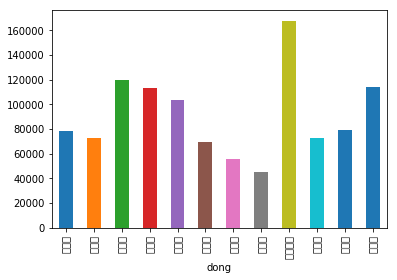

In [209]:
apt[gangnam].groupby('dong')['price'].mean().plot.bar()

#### axis

In [178]:
zlw.axes # 두가지 인덱스를 리스트로 반환, 0-> 행, 1-> 열

[RangeIndex(start=0, stop=10830, step=1),
 Index(['index', 'Date', 'RegionID', 'RegionName', 'State', 'Metro', 'County',
        'SizeRank', 'Zhvi'],
       dtype='object')]

In [181]:
zlw.mean(axis=0) #RangeIndex를 따라가며 평균내주겠다, axis='rows' 로도 가능

index         5414.500000
RegionID     84344.818837
SizeRank      5414.500000
Zhvi        250307.590028
dtype: float64

In [184]:
zlw[['index', 'RegionID']].mean(axis=1).head() # Index(칼럼) 을 따라가며 평균내주겠다, axis='columns'로도 가능

0    28469.5
1    19681.0
2    27135.5
3     9378.0
4    24141.0
dtype: float64

#### check for a substring
str메소드와 정규표현식, 그리고 map을 잘쓰자

In [192]:
zlw.RegionName.str.capitalize().head() # 문자형 함수 쓰기위해 str로 str object 가져옴

0      Abbeville
1      Abbeville
2    Abbottstown
3       Aberdeen
4       Aberdeen
Name: RegionName, dtype: object

In [205]:
zlw.RegionName.str.replace('^Abb','ABB', regex =True).head()

0      ABBeville
1      ABBeville
2    ABBottstown
3       Aberdeen
4       Aberdeen
Name: RegionName, dtype: object

In [197]:
zlw.RegionName.map(lambda x: 'This is '+x).head()

0      This is Abbeville
1      This is Abbeville
2    This is Abbottstown
3       This is Aberdeen
4       This is Aberdeen
Name: RegionName, dtype: object

#### 예제: 노벨상 수상자 데이터
dirty data 를 cleaning 해보자!

In [135]:
noveld = pd.read_json('data/nobel_winners_dirty.json')

In [5]:
noveld.head(3)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975


In [7]:
noveld.sample()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
744,,Physics,Netherlands,"July 18, 1853","February 4, 1928",male,http://en.wikipedia.org/wiki/Hendrik_Lorentz,Hendrik Lorentz,"Arnhem , Netherlands","Haarlem , Netherlands","Hendrik Lorentz , Physics, 1902",1902


In [6]:
noveld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
born_in           1052 non-null object
category          1052 non-null object
country           1052 non-null object
date_of_birth     1044 non-null object
date_of_death     1044 non-null object
gender            1040 non-null object
link              1052 non-null object
name              1052 non-null object
place_of_birth    1044 non-null object
place_of_death    1044 non-null object
text              1052 non-null object
year              1052 non-null int64
dtypes: int64(1), object(11)
memory usage: 98.7+ KB


In [26]:
noveld.describe(include='object') #nominal data에 대한 몇가지 통계값을 제시한다

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,1052,1052,1052,1044,1044,1040,1052,1052,1044,1044,1052
unique,40,7,59,853,563,2,893,998,735,410,1043
top,,Physiology or Medicine,United States,7 November 1867,,male,http://en.wikipedia.org/wiki/Michael_Levitt,Osamu Shimomura,,,"Betty Williams , Peace, 1976"
freq,910,250,350,4,362,982,4,2,29,409,2


In [25]:
noveld.groupby('country').count()['year'].sort_values(ascending=False) # groupby 이용 국가별 집계

country
United States            350
                         142
United Kingdom           106
Germany                   81
France                    63
Sweden                    29
Switzerland               26
Japan                     22
Russia                    19
Netherlands               17
Austria                   16
Italy                     16
Canada                    14
Norway                    13
Denmark                   13
Belgium                   11
Israel                    11
Australia                  9
South Africa               8
Poland                     7
Ireland                    7
Spain                      6
Argentina                  5
China                      5
India                      4
Egypt                      4
Finland                    4
Hungary                    4
Pakistan                   2
East Timor                 2
Greece                     2
Guatemala                  2
Chile                      2
Czech Republic             2
Portug

In [39]:
noveld[noveld['category']=='Chemistry'].groupby('country').count().iloc[:,0].sort_values(ascending=False) # 화학상 수상자의 국가별 집계

country
United States     71
                  30
Germany           28
United Kingdom    27
France             8
Japan              7
Switzerland        6
Israel             5
Canada             5
Sweden             4
Austria            3
Netherlands        3
Hungary            2
Norway             2
Italy              1
Poland             1
Finland            1
Egypt              1
Denmark            1
Czech Republic     1
Russia             1
Belgium            1
South Africa       1
Argentina          1
Taiwan             1
Name: born_in, dtype: int64

In [42]:
noveld2 = noveld.set_index('name')
noveld2.head(4)

,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
name,,,,,,,,,,,
César Milstein,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
Ivo Andric *,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
Vladimir Prelog *,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
Institut de Droit International,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,None,None,"Institut de Droit International , Peace, 1904",1904


In [44]:
noveld2.iloc[0]

born_in                                                           
category                                    Physiology or Medicine
country                                                  Argentina
date_of_birth                                       8 October 1927
date_of_death                                        24 March 2002
gender                                                        male
link              http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein
place_of_birth                           Bahía Blanca ,  Argentina
place_of_death                                 Cambridge , England
text                 César Milstein , Physiology or Medicine, 1984
year                                                          1984
Name: César Milstein, dtype: object

In [ ]:
noveld2.loc

In [45]:
mask = noveld.year > 2000
noveld_2000 = noveld[mask]
noveld_2000.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
13,,Physics,Belgium,6 November 1932,,male,http://en.wikipedia.org/wiki/Fran%C3%A7ois_Eng...,François Englert,"Etterbeek , Brussels , Belgium",,"François Englert , Physics, 2013",2013
32,,Economics,Cyprus,1948-02-20,,male,http://en.wikipedia.org/wiki/Christopher_A._Pi...,Christopher A. Pissarides,"Nicosia, Cyprus",,"Christopher A. Pissarides , Economics, 2010",2010
66,,Peace,Ghana,8 April 1938,,male,http://en.wikipedia.org/wiki/Kofi_Annan,Kofi Annan,"Kumasi , Ghana",,"Kofi Annan , Peace, 2001",2001
87,Italy,Physics,,"October 6, 1931",,male,http://en.wikipedia.org/wiki/Riccardo_Giacconi,Riccardo Giacconi *,"Genoa , Italy",,"Riccardo Giacconi *, Physics, 2002",2002
88,Italy,Physiology or Medicine,,6 October 1937,,male,http://en.wikipedia.org/wiki/Mario_Capecchi,Mario Capecchi *,"Verona , Italy",,"Mario Capecchi *, Physiology or Medicine, 2007",2007


#### NA 처리

#### apply, map in pandas: 
함수형 패러다임으로 series와 DF 대상으로 많은 옵션 제공

In [60]:
noveld.born_in.apply(len).head()
noveld.born_in.map(len).head()

0     0
1    22
2    22
3     0
4     0
Name: born_in, dtype: int64

In [57]:
def unknown(x):
    if not len(x):
        return 'unknown'
    else:
        return x
noveld.born_in.apply(unknown).head()

0                   unknown
1    Bosnia and Herzegovina
2    Bosnia and Herzegovina
3                   unknown
4                   unknown
Name: born_in, dtype: object

In [136]:
noveld.born_in = noveld.born_in.apply(unknown)

#### replace

In [137]:
noveld.born_in.replace('unknown', np.nan, inplace=True)
noveld.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,NaN,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,NaN,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


In [138]:
noveld[noveld.name.str.contains('\*')].name.head() # 정규식 이용해서 *이 포함된 이름에 접근

1          Ivo Andric *
2     Vladimir Prelog *
14      Simon Kuznets *
15     Menachem Begin *
16       Shimon Peres *
Name: name, dtype: object

In [147]:
noveld[noveld.name.str.contains('\*')].name = noveld[noveld.name.str.contains('\*')].name.str.replace('*','').str.strip()
# noveld.name.head()

C:\Users\Chankoo\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [140]:
noveld.name.str.contains('\*').sum()

142

#### NA check
isna, innull: 미묘한 차이있음

In [99]:
noveld[noveld.born_in.isnull()].head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
3,NaN,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,NaN,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
5,NaN,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
6,NaN,Peace,Belgium,22 April 1854,14 May 1943,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913


### dropna

In [105]:
noveld.dropna(axis=0).head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
14,Belarus,Economics,,"April 30, 1901","July 8, 1985",male,http://en.wikipedia.org/wiki/Simon_Kuznets,Simon Kuznets *,Pinsk,"Cambridge, Massachusetts","Simon Kuznets *, born in then Russian Empire,...",1971
15,Belarus,Peace,,16 August 1913,9 March 1992,male,http://en.wikipedia.org/wiki/Menachem_Begin,Menachem Begin *,"Brest , Russian Empire","Tel Aviv , Israel","Menachem Begin *, born in then Russian Empire...",1978
16,Belarus,Peace,,2 August 1923,,male,http://en.wikipedia.org/wiki/Shimon_Peres,Shimon Peres *,Poland,,"Shimon Peres *, born in then Poland, now Bela...",1994


#### duplicated
중복 여부를 리턴
#### drop_duplicates
중복값 드랍

In [121]:
noveld.duplicated('name').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [124]:
noveld[noveld.duplicated('name')].sample(5) # 중복 수상자

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
598,NaN,Chemistry,United Kingdom,9 May 1947,,male,http://en.wikipedia.org/wiki/Michael_Levitt,Michael Levitt,"Pretoria, South Africa",,"Michael Levitt , born in South Africa , Chemi...",2013
1047,NaN,Physics,Australia,"February 24, 1967",,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",,"Brian P. Schmidt , born in the United States ...",2011
995,NaN,Chemistry,Canada,"May 7, 1939",,male,http://en.wikipedia.org/wiki/Sidney_Altman,Sidney Altman,"Montreal, Quebec , Canada",,"Sidney Altman , Chemistry, 1989",1989
131,NaN,Chemistry,United Kingdom,11 August 1926,,male,http://en.wikipedia.org/wiki/Aaron_Klug,Aaron Klug,"Želva, Lithuania",,"Aaron Klug , born in Lithuania , Chemistry, 1982",1982
709,NaN,Chemistry,Poland,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Skłodowska-Curie,"Warsaw , Poland","Sancellemoz , France","Marie Skłodowska-Curie , born in partitioned ...",1911


In [119]:
all_dupes = noveld[noveld.duplicated('name')|noveld.duplicated('name',keep='last')]
all_dupes.count()

born_in            16
category          108
country           108
date_of_birth     106
date_of_death     106
gender            104
link              108
name              108
place_of_birth    106
place_of_death    106
text              108
year              108
dtype: int64

In [ ]:
noveld.drop_duplicates()

#### Tidy Data
value가 컬럼에 올때(와이드) 로우로 바꿔줘야(롱)

melt, stack, unstack

groupby, pivot_table, 

예제 데이터를 통해 cleaning 해보자!

In [2]:
pew = pd.read_table('data/pew.txt', sep='\t')

In [153]:
pew.head()
# 컬럼에 밸류가 들어간 상황, income 변수의  values 임
# 와이드 데이터 -> 롱 데이터로 바꿔야 분석 편함

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [157]:
pew.loc[[2]].mean(axis=1) # 이런식의 분석밖에 못함

2    41.1
dtype: float64

In [15]:
pewm = pew.melt(id_vars = 'religion', var_name='income')  # religion 기준으로 long하게 melt, 
pewm.income.astype('category')
pewm.head()

,religion,income,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [16]:
pewm[pewm.religion=='Hindu'] # tidy 데이터 화

,religion,income,value
6,Hindu,<$10k,1
24,Hindu,$10-20k,9
42,Hindu,$20-30k,7
60,Hindu,$30-40k,9
78,Hindu,$40-50k,11
96,Hindu,$50-75k,34
114,Hindu,$75-100k,47
132,Hindu,$100-150k,48
150,Hindu,>150k,54
168,Hindu,Don't know/refused,37


In [17]:
pewm.groupby('religion').mean() # 종교별 평균 val

,value
religion,
Agnostic,82.6
Atheist,51.5
Buddhist,41.1
Catholic,805.4
Don’t know/refused,27.2
Evangelical Prot,947.2
Hindu,25.7
Historically Black Prot,199.5
Jehovah's Witness,21.5


In [10]:
pews = pew.stack()
pews

0   religion                           Agnostic
    <$10k                                    27
    $10-20k                                  34
    $20-30k                                  60
    $30-40k                                  81
    $40-50k                                  76
    $50-75k                                 137
    $75-100k                                122
    $100-150k                               109
    >150k                                    84
    Don't know/refused                       96
1   religion                            Atheist
    <$10k                                    12
    $10-20k                                  27
    $20-30k                                  37
    $30-40k                                  52
    $40-50k                                  35
    $50-75k                                  70
    $75-100k                                 73
    $100-150k                                59
    >150k                               

In [8]:
pews.unstack()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [167]:
tb= pd.read_csv('data/tb.csv')
tb.head()

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
tbm = tb.melt(['iso2','year'])
tbm.head(10)

,iso2,year,variable,value
0,AD,1989,new_sp,NaN
1,AD,1990,new_sp,NaN
2,AD,1991,new_sp,NaN
3,AD,1992,new_sp,NaN
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0
9,AD,1999,new_sp,4.0


In [173]:
tbm.dropna(inplace=True)

In [175]:
tbm.groupby(['iso2','year']).sum() # 2변수로 groupby -> 멀티인덱스

value
iso2 year          
AD   1993      15.0
     1994      24.0
     1996      16.0
     1997      36.0
     1998       2.0
     1999       7.0
     2000       2.0
     2001       6.0
     2002       4.0
     2003      13.0
     2004       6.0
     2005      10.0
     2006      16.0
     2007       4.0
     2008       6.0
AE   1999      97.0
     2000     143.0
     2001      69.0
     2002     114.0
     2003     154.0
     2004     114.0
     2005      62.0
     2006     106.0
     2007     112.0
     2008     100.0
AF   1997     746.0
     1998    3611.0
     1999    2414.0
     2000    5558.0
     2001    9278.0
...             ...
ZA   2007  273329.0
     2008  281829.0
ZM   1994    9620.0
     1995   18615.0
     1996   12072.0
     1999   11645.0
     2000   25854.0
     2001   13024.0
     2002   32702.0
     2003   37868.0
     2004   34494.0
     2005   29714.0
     2006   28050.0
     2007   26756.0
     2008   26422.0
ZW   1993    5331.0
     1995    8965.0
     1996   11965.0
     1997   14512.0
     1998   14492.0
     1999   14414.0
     2000   14392.0
     2001   15370.0
     2002   27202.0
     2003   28976.0
     2004   29162.0
     2005   26310.0
     2006   25436.0
     2007   21489.0
     2008   19660.0

[3071 rows x 1 columns]

In [177]:
wth = pd.read_csv('data/weather.txt',sep='\t')
wth.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
wthm = wth.melt(['id','year','month','element']).dropna()
wthm.head()

,id,year,month,element,variable,value
20,MX000017004,2010,12,TMAX,d1,299.0
21,MX000017004,2010,12,TMIN,d1,138.0
24,MX000017004,2010,2,TMAX,d2,273.0
25,MX000017004,2010,2,TMIN,d2,144.0
40,MX000017004,2010,11,TMAX,d2,313.0


In [190]:
wthm.id.unique() # 의미없는 id

array(['MX000017004'], dtype=object)

In [191]:
wthm.drop('id',axis=1,inplace=True) # id 칼럼 드랍

In [192]:
wthm.reset_index(inplace=True, drop=True)

In [194]:
wthm.tail(10)

,year,month,element,variable,value
56,2010,10,TMAX,d28,312.0
57,2010,10,TMIN,d28,150.0
58,2010,6,TMAX,d29,301.0
59,2010,6,TMIN,d29,180.0
60,2010,8,TMAX,d29,280.0
61,2010,8,TMIN,d29,153.0
62,2010,1,TMAX,d30,278.0
63,2010,1,TMIN,d30,145.0
64,2010,8,TMAX,d31,254.0
65,2010,8,TMIN,d31,154.0


In [197]:
wthm.sort_values(['year','month'],inplace=True)

In [198]:
wthm.reset_index(inplace=True, drop=True)

In [199]:
wthm.head(10)

,year,month,element,variable,value
0,2010,1,TMAX,d30,278.0
1,2010,1,TMIN,d30,145.0
2,2010,2,TMAX,d2,273.0
3,2010,2,TMIN,d2,144.0
4,2010,2,TMAX,d3,241.0
5,2010,2,TMIN,d3,144.0
6,2010,2,TMAX,d11,297.0
7,2010,2,TMIN,d11,134.0
8,2010,2,TMAX,d23,299.0
9,2010,2,TMIN,d23,107.0


In [201]:
wthm.element = wthm.element.str.replace('T','')

In [203]:
wthm[wthm.element=='MIN'].groupby('month').mean() # 월 별 min 의 평균

,year,value
month,,
1,2010,145.000000
2,2010,132.250000
3,2010,162.000000
4,2010,167.000000
5,2010,182.000000
6,2010,177.500000
7,2010,170.000000
8,2010,158.428571
10,2010,130.800000


In [208]:
wthm.pivot_table(wthm,index = 'month')[['value']]

,value
month,
1,211.500000
2,204.875000
3,243.833333
4,265.000000
5,257.000000
6,234.000000
7,231.250000
8,220.571429
10,209.900000


#### stack, unstack:
stack : 칼럼따라서 한열로 쌓아줌 (melt와 비슷)

unstack: 로우따라서 한열로 쌓아줌

In [223]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [213]:
pews = pew.set_index('religion').stack()
pews.head(10)

religion                    
Agnostic  <$10k                  27
          $10-20k                34
          $20-30k                60
          $30-40k                81
          $40-50k                76
          $50-75k               137
          $75-100k              122
          $100-150k             109
          >150k                  84
          Don't know/refused     96
dtype: int64

In [220]:
pew.set_index('religion').unstack() 

                    religion               
<$10k               Agnostic                     27
                    Atheist                      12
                    Buddhist                     27
                    Catholic                    418
                    Don’t know/refused           15
                    Evangelical Prot            575
                    Hindu                         1
                    Historically Black Prot     228
                    Jehovah's Witness            20
                    Jewish                       19
                    Mainline Prot               289
                    Mormon                       29
                    Muslim                        6
                    Orthodox                     13
                    Other Christian               9
                    Other Faiths                 20
                    Other World Religions         5
                    Unaffiliated                217
$10-20k             

#### rename

In [224]:
pew.index.rename('A')

RangeIndex(start=0, stop=18, step=1, name='A')

In [232]:
tmp = pew['<$10k']

In [231]:
tmp.rename('ASDASD',inplace=True) # series의 rename도 가능
tmp

0      27
1      12
2      27
3     418
4      15
5     575
6       1
7     228
8      20
9      19
10    289
11     29
12      6
13     13
14      9
15     20
16      5
17    217
Name: ASDASD, dtype: int64

#### astype:
cat, date, str 등으로 바까줄때 유용함

In [249]:
noveld.date_of_birth.astype('datetime64').head()

0   1927-10-08
1   1892-10-09
2   1906-07-23
3          NaT
4   1829-07-26
Name: date_of_birth, dtype: datetime64[ns]

In [239]:
wth.element = wth.element.astype('category') #categorical dtype으로 바까줌
wth.element

0     TMAX
1     TMIN
2     TMAX
3     TMIN
4     TMAX
5     TMIN
6     TMAX
7     TMIN
8     TMAX
9     TMIN
10    TMAX
11    TMIN
12    TMAX
13    TMIN
14    TMAX
15    TMIN
16    TMAX
17    TMIN
18    TMAX
19    TMIN
20    TMAX
21    TMIN
Name: element, dtype: category
Categories (2, object): [TMAX, TMIN]

In [240]:
wth.element.describe(include='object') #categorical data엔 object describe 가능

count       22
unique       2
top       TMIN
freq        11
Name: element, dtype: object

#### .cat:
categorical data에 대한 메소드 제공

In [242]:
wth.element.cat.codes # dummy var로 바까줌

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
dtype: int8

#### 예제: tips 데이터

In [254]:
tip = sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [255]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [256]:
tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [258]:
tip.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [283]:
tip.groupby('smoker').tip.mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [267]:
tip.groupby(['sex','smoker']).mean()[['tip']].transpose()

sex         Male              Female          
smoker       Yes        No       Yes        No
tip     3.051167  3.113402  2.931515  2.773519

In [271]:
pd.pivot_table(tip,index=['sex','smoker'])[['tip']].transpose()

sex         Male              Female          
smoker       Yes        No       Yes        No
tip     3.051167  3.113402  2.931515  2.773519

In [278]:
sextip =tip.groupby('sex').mean().tip

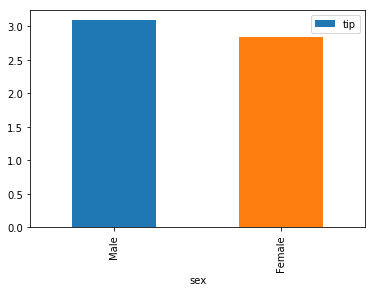

In [280]:
sextip.plot.bar(legend=True)

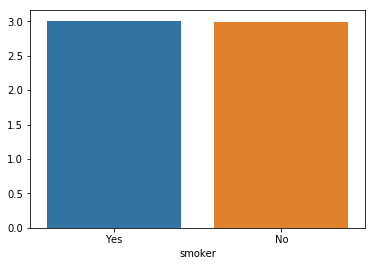

In [291]:
sns.barplot(x=tmp.index,y=tmp.values)

#### 예제: 빌보드데이터

In [13]:
bil = pd.read_csv('data/billboard2.csv', encoding='utf-8')

In [3]:
bil.head() #롱데이터

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
bil.axes[1] #week 을 밸류화 해야한다

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [14]:
bil_long = bil.melt(
    id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name = 'week',
    value_name='rating'
)

In [5]:
bil_long.sample(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rating
9615,2000,DMX,Party Up (Up In Here),3:45,Rap,2000-02-26,2000-04-22,x31st.week,NaN
5024,2000,Ginuwine,The Best Man I Can Be,4:06,Rock,2000-01-08,2000-03-04,x16th.week,NaN
15556,2000,Destiny's Child,Jumpin' Jumpin',3:48,Rock,2000-05-13,2000-08-19,x50th.week,NaN


In [6]:
bil_long.shape

(24092, 9)

In [7]:
bil_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
year               24092 non-null int64
artist.inverted    24092 non-null object
track              24092 non-null object
time               24092 non-null object
genre              24092 non-null object
date.entered       24092 non-null object
date.peaked        24092 non-null object
week               24092 non-null object
rating             5306 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


In [11]:
bil_long.nlargest(10,'rating')

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rating
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x1st.week,100.0
248,2000,Drama,"Left, Right, Left",3:37,Rap,2000-02-12,2000-03-18,x1st.week,100.0
300,2000,"Herndon, Ty",No Mercy,4:43,Country,2000-03-18,2000-05-06,x1st.week,100.0
303,2000,Lil' Mo,Ta Da,4:17,Rap,2000-08-12,2000-09-16,x1st.week,100.0
307,2000,"Larrieux, Amel",Get Up,4:02,R&B,2000-03-04,2000-03-11,x1st.week,100.0
581,2000,Jay-Z,Hey Papi,3:40,Rap,2000-08-12,2000-10-07,x2nd.week,100.0
612,2000,"Hart, Beth",L.A. Song,3:47,Country,1999-11-27,2000-01-15,x2nd.week,100.0
613,2000,"Diffie, Joe",The Quittin' Kind,3:23,Country,2000-01-01,2000-01-22,x2nd.week,100.0
915,2000,Juvenile,U Understand,3:51,Rap,2000-02-05,2000-02-12,x3rd.week,100.0
930,2000,"Diffie, Joe",The Quittin' Kind,3:23,Country,2000-01-01,2000-01-22,x3rd.week,100.0


#### 예제: 에볼라데이터

In [2]:
ebola = pd.read_csv('data/country_timeseries.csv')

In [53]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [54]:
ebola.info() #밸류인 국가명이 변수로 들어간 문제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [3]:
ebola_long = ebola.melt(
    id_vars= ['Date','Day'],
#     var_name = ['Cases'],
#     value_name = 'Deaths'
)

In [56]:
ebola_long.sample(10)

,Date,Day,variable,value
1668,6/19/2014,89,Deaths_UnitedStates,NaN
947,5/12/2014,51,Cases_Mali,NaN
1688,4/22/2014,31,Deaths_UnitedStates,NaN
117,3/27/2014,5,Cases_Guinea,103.0
130,12/21/2014,273,Cases_Liberia,NaN
60,8/20/2014,151,Cases_Guinea,607.0
1413,7/23/2014,123,Deaths_Nigeria,0.0
337,5/12/2014,51,Cases_SierraLeone,0.0
185,8/13/2014,144,Cases_Liberia,786.0
802,7/27/2014,126,Cases_Spain,NaN


In [57]:
var_split = ebola_long['variable'].str.split('_')

In [58]:
var_split.head()

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [59]:
type(var_split)

pandas.core.series.Series

In [60]:
status_value = var_split.str[0]
status_value.head()

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: variable, dtype: object

In [61]:
country_value = var_split.str[1]

In [62]:
ebola_long['country'] = country_value
ebola_long['status'] = status_value
ebola_long.drop(columns='variable', inplace=True)

In [63]:
ebola_long.sample(10)

,Date,Day,value,country,status
673,8/13/2014,144,NaN,UnitedStates,Cases
799,8/4/2014,135,NaN,Spain,Cases
83,6/18/2014,88,390.0,Guinea,Cases
1233,12/7/2014,260,1768.0,SierraLeone,Deaths
627,11/23/2014,246,4.0,UnitedStates,Cases
651,10/8/2014,200,1.0,UnitedStates,Cases
1792,6/17/2014,87,NaN,Spain,Deaths
1141,10/5/2014,197,NaN,Liberia,Deaths
1951,3/22/2014,0,NaN,Mali,Deaths
243,3/22/2014,0,NaN,Liberia,Cases


In [69]:
ebola_long[ebola_long['status']=='Deaths'].groupby(['country']).sum()[['value']]

,value
country,
Guinea,51818.0
Liberia,89198.0
Mali,38.0
Nigeria,233.0
Senegal,0.0
SierraLeone,60352.0
Spain,3.0
UnitedStates,15.0


#### 예제: weather 데이터

In [8]:
wth = pd.read_table('data/weather.txt',sep='\t')

In [10]:
wth.head(10)

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX000017004,2010,3,TMIN,NaN,NaN,NaN,NaN,142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX000017004,2010,4,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,363.0,NaN,NaN,NaN,NaN
7,MX000017004,2010,4,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,167.0,NaN,NaN,NaN,NaN
8,MX000017004,2010,5,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,332.0,NaN,NaN,NaN,NaN
9,MX000017004,2010,5,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN


In [12]:
wth.drop(columns = 'id',inplace=True)

In [18]:
wth_long = wth.melt(id_vars=['year','month','element'], var_name = 'day')

In [23]:
wth_long.dropna(inplace=True)

In [24]:
wth_long.sample(10)

,year,month,element,day,value
674,2010,8,TMAX,d31,254.0
20,2010,12,TMAX,d1,299.0
298,2010,7,TMAX,d14,299.0
202,2010,3,TMAX,d10,345.0
334,2010,3,TMAX,d16,311.0
299,2010,7,TMIN,d14,165.0
223,2010,2,TMIN,d11,134.0
626,2010,6,TMAX,d29,301.0
92,2010,3,TMAX,d5,321.0
639,2010,1,TMIN,d30,145.0


In [28]:
wth_long.pivot_table(
    index = ['year','month','day'],
    columns = 'element').reset_index()

year month  day  value       
element                    TMAX   TMIN
0        2010     1  d30  278.0  145.0
1        2010     2  d11  297.0  134.0
2        2010     2   d2  273.0  144.0
3        2010     2  d23  299.0  107.0
4        2010     2   d3  241.0  144.0
5        2010     3  d10  345.0  168.0
6        2010     3  d16  311.0  176.0
7        2010     3   d5  321.0  142.0
8        2010     4  d27  363.0  167.0
9        2010     5  d27  332.0  182.0
10       2010     6  d17  280.0  175.0
11       2010     6  d29  301.0  180.0
12       2010     7  d14  299.0  165.0
13       2010     7   d3  286.0  175.0
14       2010     8  d13  298.0  165.0
15       2010     8  d23  264.0  150.0
16       2010     8  d25  297.0  156.0
17       2010     8  d29  280.0  153.0
18       2010     8  d31  254.0  154.0
19       2010     8   d5  296.0  158.0
20       2010     8   d8  290.0  173.0
21       2010    10  d14  295.0  130.0
22       2010    10  d15  287.0  105.0
23       2010    10  d28  312.0  150.0
24       2010    10   d5  270.0  140.0
25       2010    10   d7  281.0  129.0
26       2010    11   d2  313.0  163.0
27       2010    11  d26  281.0  121.0
28       2010    11  d27  277.0  142.0
29       2010    11   d4  272.0  120.0
30       2010    11   d5  263.0   79.0
31       2010    12   d1  299.0  138.0
32       2010    12   d6  278.0  105.0